In [2]:
import pandas as pd
import numpy as np 

In [3]:
titanic_df = pd.read_csv("processed.csv")

In [4]:
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,C,S,Q
0,0,3,"Braund, Mr. Owen Harris",1.0,22.0,7.2500,S,0.0,0.0,1.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,71.2833,C,1.0,0.0,0.0
2,1,3,"Heikkinen, Miss. Laina",0.0,26.0,7.9250,S,0.0,0.0,1.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.0,53.1000,S,0.0,0.0,1.0
4,0,3,"Allen, Mr. William Henry",1.0,35.0,8.0500,S,0.0,0.0,1.0


In [5]:
titanic_df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
Fare        0
Embarked    0
C           0
S           0
Q           0
dtype: int64

In [6]:
from sklearn.model_selection import train_test_split

x = titanic_df[["Pclass", "Sex", "Age", "Fare", "S", "C", "Q"]]
y = titanic_df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(predictions, y_test)
print("Accuracy", accuracy)

Accuracy 0.797752808988764


In [19]:
# To monitor the progress of our MLP over epochs

clf = MLPClassifier(random_state=1)

epochs = 3000

for epoch in range(epochs):
    clf.partial_fit(X_train, y_train, classes=np.unique(y_train))
    y_pred = clf.predict(X_train)
    accuracy = accuracy_score(y_pred, y_train)
    loss = clf.loss_
    print(f"Epoch {epoch + 1}/{epochs} - Loss: {loss} - Accuracy: {accuracy}")

Epoch 1/3000 - Loss: 0.6377580954812624 - Accuracy: 0.6751054852320675
Epoch 2/3000 - Loss: 0.6192751393168168 - Accuracy: 0.6891701828410689
Epoch 3/3000 - Loss: 0.6087171473887607 - Accuracy: 0.6849507735583685
Epoch 4/3000 - Loss: 0.5997908277170444 - Accuracy: 0.6751054852320675
Epoch 5/3000 - Loss: 0.5888206433273853 - Accuracy: 0.6835443037974683
Epoch 6/3000 - Loss: 0.5832476195132172 - Accuracy: 0.6891701828410689
Epoch 7/3000 - Loss: 0.5769634513031193 - Accuracy: 0.6779184247538678
Epoch 8/3000 - Loss: 0.5752927190171205 - Accuracy: 0.6835443037974683
Epoch 9/3000 - Loss: 0.5724054024571053 - Accuracy: 0.6863572433192686
Epoch 10/3000 - Loss: 0.5686660887532329 - Accuracy: 0.6891701828410689
Epoch 11/3000 - Loss: 0.5649042741397232 - Accuracy: 0.6947960618846695
Epoch 12/3000 - Loss: 0.5609795883656554 - Accuracy: 0.6877637130801688
Epoch 13/3000 - Loss: 0.5588999441166019 - Accuracy: 0.6891701828410689
Epoch 14/3000 - Loss: 0.5565651285059673 - Accuracy: 0.69901547116737
Epo

In [21]:
predictions = clf.predict(X_test)
accuracy = accuracy_score(predictions, y_test)
print("Accuracy", accuracy)

Accuracy 0.8033707865168539


In [34]:
# Even with 3000 epochs, the accuracy of our MLP is only marginally better
# So how do we improve the performance of our MLP further? Hyperparameter Tuning!

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
import numpy as np

param_grid = {'learning_rate_init': np.arange(0.001, 0.006, 0.001)}
base_estimator = MLPClassifier(random_state=1)
sh = HalvingGridSearchCV(base_estimator, param_grid, cv=5, factor=2, min_resources=80).fit(x, y)
print(sh.best_estimator_)

/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Opti

MLPClassifier(learning_rate_init=0.003, random_state=1)


In [35]:
# Training our MLP with the best hyperparameters
clf = MLPClassifier(random_state=1, max_iter=300, learning_rate_init=0.003).fit(X_train, y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(predictions, y_test)
print("Accuracy", accuracy)

Accuracy 0.8033707865168539


In [36]:
print(clf.n_iter_)

80


In [37]:
# FOR FUN: Visulizing how value of loss function varies over epochs
losses = []
for i in range(clf.n_iter_):
    losses.append(clf.loss_curve_[i])
print(losses)

[0.7974038515166756, 0.7555413412779212, 0.6815462139772895, 0.6161572402947509, 0.6083502724974897, 0.5785583516971476, 0.5675757763741405, 0.5623732873532985, 0.5535287227669516, 0.5568048964789372, 0.5505524943488126, 0.5528887319347686, 0.5381839356669562, 0.5319582533287569, 0.5373361529385506, 0.527263571303993, 0.5255184262610394, 0.516650763152734, 0.5095215925418836, 0.5086633313302916, 0.5018425686516628, 0.5089960063345729, 0.4968684169050475, 0.50357797658431, 0.49464958965444744, 0.49661938181139004, 0.4944156142958539, 0.4906159823723685, 0.4902634590336521, 0.4856964608791142, 0.48655447486395936, 0.4919091384385224, 0.47610118629360804, 0.4825117892118452, 0.4843268186759196, 0.4762358788361016, 0.46990839636875925, 0.46970555526683927, 0.4730383822046994, 0.46979252705924607, 0.46628320026310605, 0.46664287408838134, 0.46437261096331084, 0.46534946438371777, 0.46776303243133044, 0.4755789647307934, 0.4665754956800275, 0.45806580710128536, 0.45771133755520516, 0.4634379

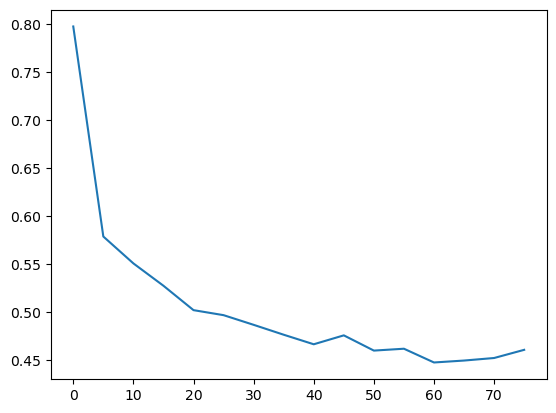

In [44]:
import matplotlib.pyplot as plt

plt.plot(range(0, clf.n_iter_, 5), list(losses[i] for i in range(0,clf.n_iter_, 5)))